In [2]:

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
df= pd.read_csv('Housing.csv')
#First look at the data
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [6]:
#Shape of the data
print(df.shape)
#Checking the null values in the dataset
df.isnull().sum()


(506, 14)


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

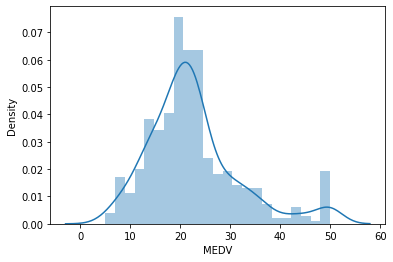

In [8]:
import seaborn as sns
sns.distplot(df['MEDV'])


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MEDV'>

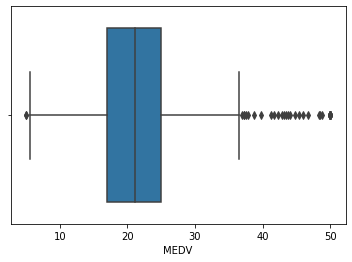

In [9]:
sns.boxplot(df['MEDV'])

In [10]:
correlation = df.corr()
correlation.loc['MEDV']


CRIM      -0.391363
ZN         0.373136
INDUS     -0.481772
CHAS       0.181391
NOX       -0.427321
RM         0.695360
AGE       -0.394656
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.735822
MEDV       1.000000
Name: MEDV, dtype: float64

<AxesSubplot:>

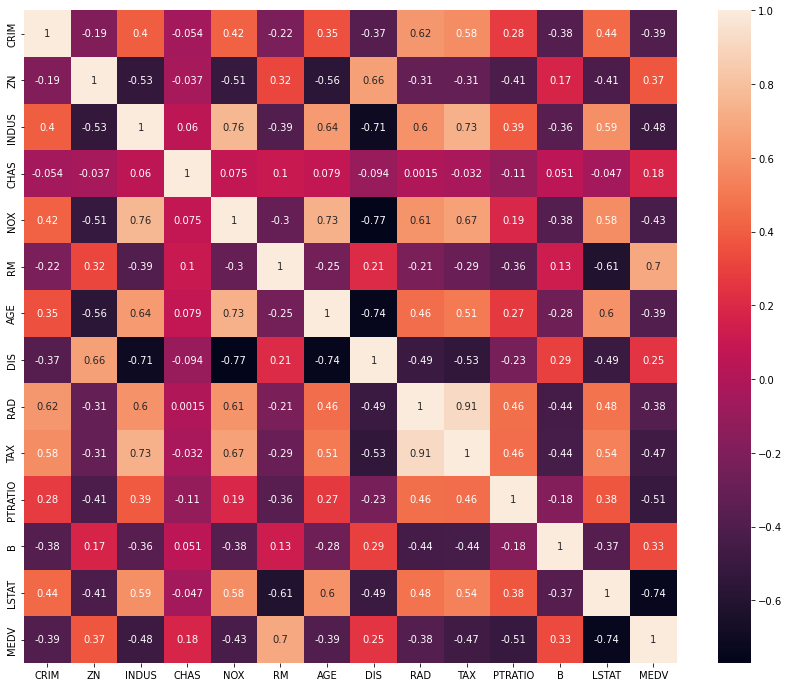

In [11]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(figsize=(15,12))
sns.heatmap(correlation,square = True,annot = True)


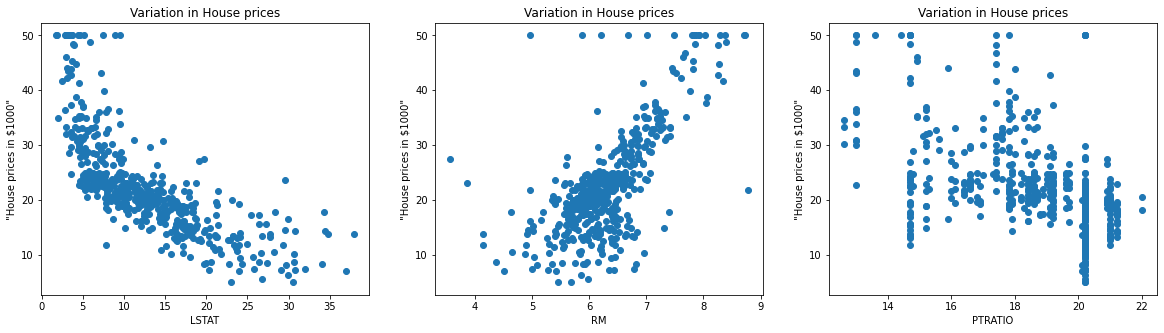

In [12]:
plt.figure(figsize = (20,5))
features = ['LSTAT','RM','PTRATIO']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = df['MEDV']
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')


In [13]:
X = df.iloc[:,:-1]
y= df['MEDV']


In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)


In [21]:
model = Sequential()
model.add(Dense(10,activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))

# Compiling the model
model.compile(
 loss = tf.keras.losses.mean_squared_error,
 optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01),
 metrics = ['mse']
)
model.fit(X_train,y_train,epochs=50,batch_size=32,verbose=True)

Epoch 1/50
15/15 [==============================] - 1s 3ms/step - loss: nan - mse: nan
Epoch 2/50
15/15 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 3/50
15/15 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 4/50
15/15 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 8/50
15/15 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 9/50
15/15 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 10/50
15/15 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 11/50
15/15 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 12/50
15/15 [======================

In [ ]:

# import keras
# from keras.layers import Dense, Activation,Dropout
# from keras.models import Sequential
# model = Sequential()
# model.add(Dense(128,activation = 'relu',input_dim =13))
# model.add(Dense(64,activation = 'relu'))

# model.add(Dense(32,activation = 'relu'))
# model.add(Dense(16,activation = 'relu'))
# model.add(Dense(1))
# #model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# model.compile(optimizer = 'adam',loss ='mean_squared_error',metrics=['mae'])



2/2 [==============================] - 0s 3ms/step


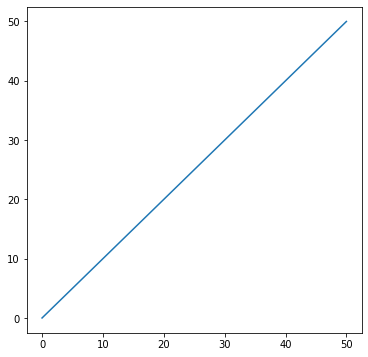

In [23]:
pred=model.predict(X_test)
plt.figure(figsize=(6,6))
plt.scatter(y_test,pred,c='crimson')
plt.plot(range(int(max(max(y_test),max(pred)[0]))+1))
